#Graduate Admission Prediction Predictive modelling and Tuning

In [278]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


In [279]:
df = pd.read_csv('C:/Users/Kunj/Desktop/Admission Prediction/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [280]:
df=df.drop(['Serial No.'], axis=1)
#y = df['Chance of Admit ']
X_train, X_test = train_test_split(df,test_size = 0.20, shuffle=False)

## Helper Functions

Func: show_the_data

In [281]:
def show_the_data(data):
    data.info()
    print("\n\nThe columns are {}".format(data.columns))
    print("\n\nActual Data\n",data.head(2))

Func: categorize

In [282]:
def categorize(data,col):
    numerical,category=[],[]
    for i in col:
        if data[i].dtype ==object:
            category.append(i)
        else:
            numerical.append(i)
    print("The numerical features {}:".format(numerical))
    print("The categorical features {}:".format(category))
    return category,numerical

Func: get_correlated

In [283]:
def get_correlated(cor):
    correlated =set()
    for i in cor.columns:
        for j in cor.columns:
            if cor[i][j]>0.7  and i!=j:
                correlated.add(i)
                correlated.add(j)
    print("The Correlated columns: {}".format(list(correlated)))
    return correlated

In [284]:
show_the_data(X_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


The columns are Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


Actual Data
    GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                

In [285]:
show_the_data(X_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 400 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          100 non-null    int64  
 1   TOEFL Score        100 non-null    int64  
 2   University Rating  100 non-null    int64  
 3   SOP                100 non-null    float64
 4   LOR                100 non-null    float64
 5   CGPA               100 non-null    float64
 6   Research           100 non-null    int64  
 7   Chance of Admit    100 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 7.0 KB


The columns are Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


Actual Data
      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
400        304          100                  2  3.5   3.0  8.22         0   
401        315          105         

In [286]:
cat,num = categorize(X_train,X_train.columns)

The numerical features ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']:
The categorical features []:


In [287]:
print("There are {} categorical features in train dataset".format(len(cat)))
print("There are {} numerical features in train dataset".format(len(num)))

There are 0 categorical features in train dataset
There are 8 numerical features in train dataset


In [288]:
cat1,num1 = categorize(X_test,X_test.columns)

The numerical features ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']:
The categorical features []:


In [289]:
print("There are {} categorical features in test dataset".format(len(cat1)))
print("There are {} numerical features in test dataset".format(len(num1)))

There are 0 categorical features in test dataset
There are 8 numerical features in test dataset


One thing about this dataset is that it doesn't have any categorical values therefore there is no need to perform categorical to numerical conversion which is one of the crucial steps in Feature Engineering

## CHECKING FOR MISSING VALUES</center>

In [290]:
X_train.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [291]:
X_test.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

The good news is that we don't have any missing values so now we can exclude handling missing values step which i one another important step in feature engineering.

# Visualizing the Target Feature's Distribution</center>

> Indented block



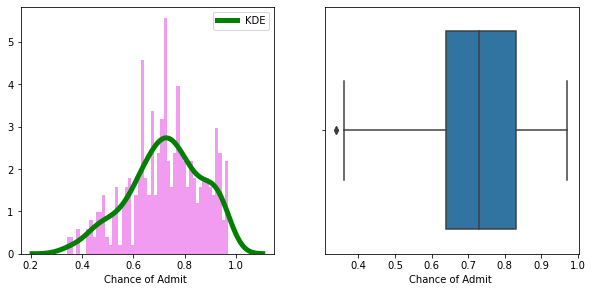

In [292]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
#train['Chance of Admit '].hist()
sns.distplot(X_train['Chance of Admit '],bins=50,color='Violet',  kde_kws={"color": "g", "lw": 5, "label": "KDE"},hist_kws={"linewidth": 5,"alpha": 0.8 })
plt.subplot(2,2,2)
sns.boxplot(X_train['Chance of Admit '])

In [293]:
corr = get_correlated(X_train.corr())

The Correlated columns: ['Chance of Admit ', 'CGPA', 'LOR ', 'GRE Score', 'University Rating', 'TOEFL Score', 'SOP']


In [294]:
if len(corr) == len(X_train.columns):
    print("ALL THE FEATURES ARE HIGHELY CORRELATED!!!")
else:
    print("THERE ARE SOME FEATURES WITH LOW CORRELATION...")

THERE ARE SOME FEATURES WITH LOW CORRELATION...


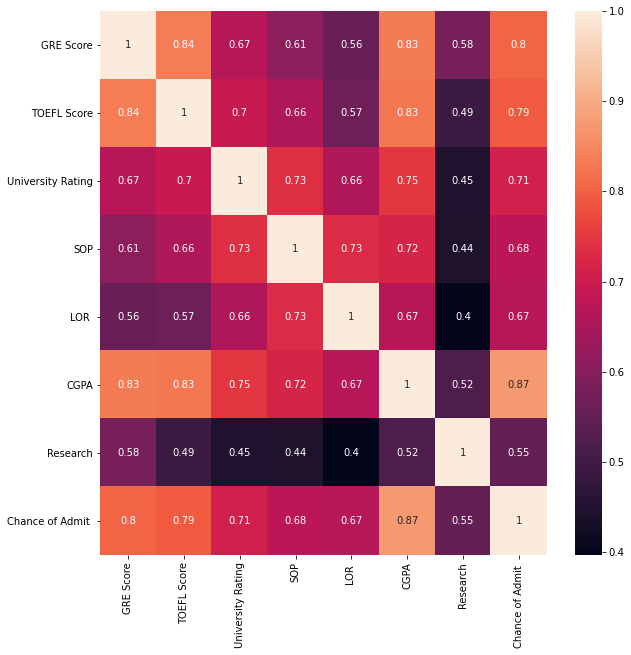

In [295]:
plt.figure(figsize =(10,10))
sns.heatmap(X_train.corr(),annot= True,cmap = 'rocket')

In [296]:
data = X_train[corr]
test_data = X_test[corr]

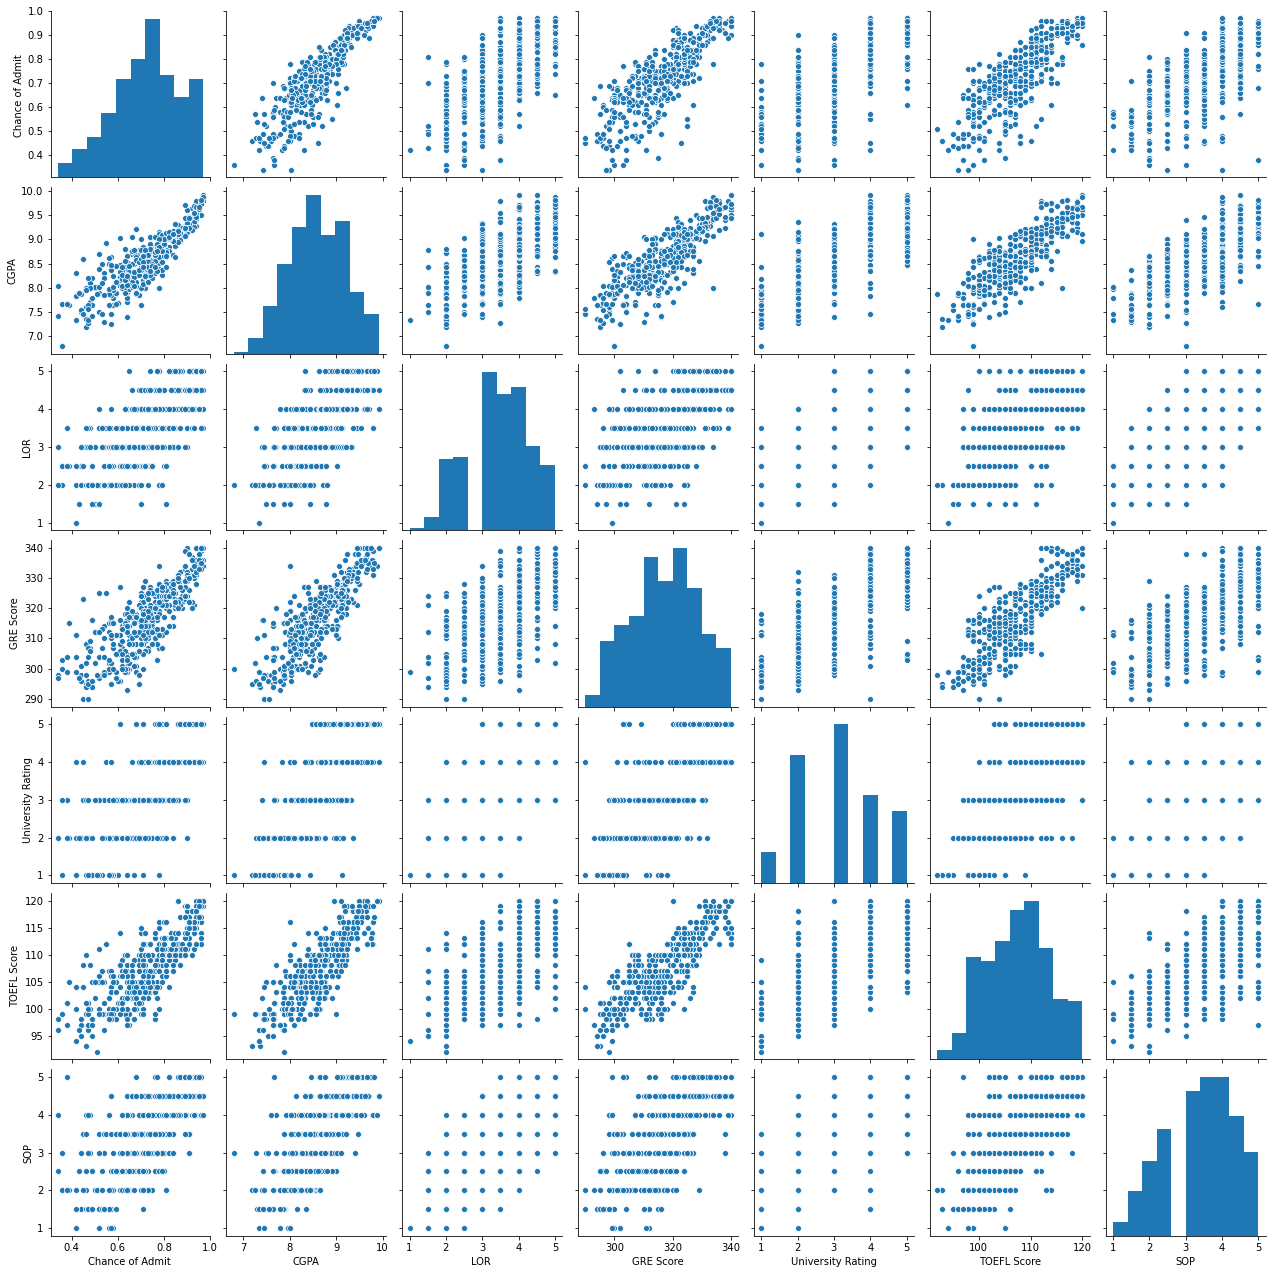

In [297]:
sns.pairplot(data)

In [298]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00


# OUTLIER DETECTION USING Z-SCORE METHOD

In [299]:

def outlier(data):
    out1=[]
    for col in data.columns:
        outliers =[]
        mean = data[col].mean()
        std = data[col].std()
        for i in data[col]:
                z = (i - mean)/std
                if z>2:
                    outliers.append(i)
        out1.append(list(outliers))
        print("There are {} outliers in {} feature".format(len(outliers),col))
    return out1

In [300]:
out = outlier(data)

There are 0 outliers in Chance of Admit  feature
There are 7 outliers in CGPA feature
There are 0 outliers in LOR  feature
There are 8 outliers in GRE Score feature
There are 0 outliers in University Rating feature
There are 8 outliers in TOEFL Score feature
There are 0 outliers in SOP feature


**To Delete the ouliers I will first replace all the outliers values with np.nan and will delete them using dropna method**

In [301]:
j =0
columns =data.columns
for i in out:
    for val in data[columns[j]]:
        if val in i:
            data[columns[j]]= data[columns[j]].replace(val,np.nan)
    j =j+1

<ipython-input-301-85180547d5e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns[j]]= data[columns[j]].replace(val,np.nan)


In [302]:
data.isnull().sum()

Chance of Admit      0
CGPA                 7
LOR                  0
GRE Score            8
University Rating    0
TOEFL Score          8
SOP                  0
dtype: int64

In [303]:
data.dropna(axis = 0,inplace =True)

<ipython-input-303-7b15d8ed7d97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis = 0,inplace =True)


In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Chance of Admit    384 non-null    float64
 1   CGPA               384 non-null    float64
 2   LOR                384 non-null    float64
 3   GRE Score          384 non-null    float64
 4   University Rating  384 non-null    int64  
 5   TOEFL Score        384 non-null    float64
 6   SOP                384 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 24.0 KB


# Dividing the data into dependent and independent features

In [305]:
y  = data['Chance of Admit ']
t_test = test_data['Chance of Admit ']
data.drop(['Chance of Admit '],axis =1,inplace =True)
test_data.drop(['Chance of Admit '],axis = 1,inplace = True)

C:\Users\Kunj\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Performing Standardization

In [306]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
data_ss = ss.fit_transform(data)
ss1 = SS()
test_ss = ss.fit_transform(test_data)

# Let's try some machine learning models

In [307]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR 
from sklearn.metrics import r2_score

In [308]:
key = ['Linear Regression','Decision Tree Regression','Random Forest Regression','Gradient Boosting Regression','Ada Boosting Regression','K-Neighbors Regression','Support Vector Regression']
value = [LR(),DTR(),RFR(),GBR(),ABR(),KNR(),SVR()]
pred=[]
models = dict(zip(key,value))
print(models)

{'Linear Regression': LinearRegression(), 'Decision Tree Regression': DecisionTreeRegressor(), 'Random Forest Regression': RandomForestRegressor(), 'Gradient Boosting Regression': GradientBoostingRegressor(), 'Ada Boosting Regression': AdaBoostRegressor(), 'K-Neighbors Regression': KNeighborsRegressor(), 'Support Vector Regression': SVR()}


In [309]:
for name,algo in models.items():
    model=algo
    model.fit(data_ss,y)
    predictions = model.predict(test_ss)
    acc=r2_score(t_test, predictions)
    pred.append(acc)
    print(name,acc)

Linear Regression 0.8898062336357835
Decision Tree Regression 0.5479355521206799
Random Forest Regression 0.8655483957837484
Gradient Boosting Regression 0.8557700612575226
Ada Boosting Regression 0.8097123763212876
K-Neighbors Regression 0.8261891662357744
Support Vector Regression 0.7708192315193884


# Plotting the accuracy of each model

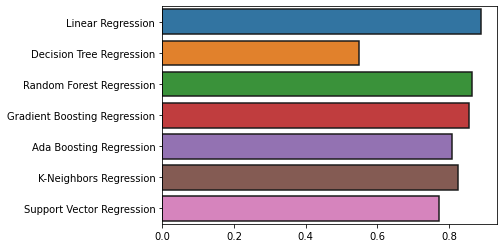

In [310]:
sns.barplot(y=key,x=pred,linewidth=1.5,orient ='h',edgecolor="0.1")

# Without any hyper parameter tuning we found that KN Regression is good in terms of accuracy. Let's Perform Hyper Parameter Tuning on it

In [311]:
n_neighbors = list(np.arange(1,6))
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree','brute']
metric =['euclidean','manhattan','chebyshev','minkowski']
p =[1,2]
leaf_size = list(np.arange(20,200,40))
random_grid = {'n_neighbors':n_neighbors,'weights':weights,'p':p,'leaf_size':leaf_size,'algorithm':algorithm,'metric':metric}
print(random_grid)


{'n_neighbors': [1, 2, 3, 4, 5], 'weights': ['uniform', 'distance'], 'p': [1, 2], 'leaf_size': [20, 60, 100, 140, 180], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}


In [312]:
from sklearn.model_selection import RandomizedSearchCV
rf = KNR()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(data_ss, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished


RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [20, 60, 100, 140, 180],
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev', 'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=2)

In [313]:
rf_random.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', leaf_size=60, metric='manhattan')

In [321]:
final = KNR(algorithm='ball_tree', leaf_size=60, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='distance')
final.fit(data_ss,y)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=60, metric='manhattan',
                    n_neighbors=6, weights='distance')

# Evaluating the effect of hyperparmeter optimization

In [322]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [323]:
base_model = KNR()
base_model.fit(data_ss, y)
base_accuracy = evaluate(base_model, test_ss, t_test)

Model Performance
Average Error: 0.0434 degrees.
Accuracy = 93.07%.


In [324]:
best_model = final
best_accuracy = evaluate(best_model, test_ss, t_test)

Model Performance
Average Error: 0.0411 degrees.
Accuracy = 93.40%.


In [325]:
print('Improvement of {:0.2f}%.'.format( 
    100*(best_accuracy-base_accuracy)/base_accuracy))

Improvement of 0.36%.


As there is a improvement we will use our best model  as  our final model

In [332]:
final = best_model
pred = final.predict(test_ss)
pred[:110]

array([0.59599633, 0.69141844, 0.80422413, 0.8699381 , 0.4865327 ,
       0.52048596, 0.67859084, 0.60009291, 0.56819695, 0.589485  ,
       0.60938974, 0.60865677, 0.63401068, 0.65107813, 0.74356223,
       0.78646598, 0.65380049, 0.63768024, 0.68020746, 0.61542657,
       0.50800833, 0.75273766, 0.75650723, 0.94441861, 0.88987085,
       0.89388166, 0.72483804, 0.72171817, 0.70746297, 0.91666225,
       0.67703825, 0.7241535 , 0.82829975, 0.77657728, 0.64612481,
       0.63146236, 0.59959241, 0.59510293, 0.71718037, 0.67231198,
       0.62854332, 0.7482868 , 0.9159235 , 0.88518597, 0.88176761,
       0.90696094, 0.91264452, 0.76530794, 0.68366466, 0.73445683,
       0.76208088, 0.86314267, 0.89882324, 0.7523791 , 0.66171556,
       0.55159493, 0.60039554, 0.52199117, 0.66813919, 0.89804839,
       0.76816368, 0.6499042 , 0.63454301, 0.61096292, 0.51299702,
       0.69806623, 0.75738288, 0.80252907, 0.820477  , 0.78756148,
       0.86043709, 0.6306068 , 0.89105833, 0.63497982, 0.63800

Text(0.5, 0, 'Prediction level')

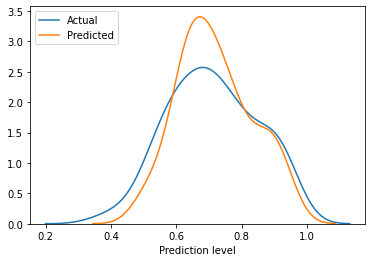

In [333]:
sns.distplot(t_test,hist=False,label = 'Actual')
sns.distplot(pred,hist=False, label ='Predicted')
plt.legend(loc="upper left")
plt.xlabel('Prediction level')


#References
1.	Dataset: https://www.kaggle.com/mohansacharya/graduate-admissions
2.	https://www.statisticshowto.com/probability-and-statistics/z-score/
3.	https://stackoverflow.com/questions/57426633/what-is-randomsearchcv-and-gridsearchcv
4.	https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0
5.	https://www.kaggle.com/himanshupadhiar/graduate-admission-prediction
